<h1><center style="font-size: 48px">CFIS-galsim statistics</center></h1>
<br><br>

In [1]:
import numpy as np
import scipy as sp
from astropy import constants as cst
import ldac
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Read stars and galaxies input galsim catalogues

In [2]:
gal_input = ldac.LDACCat("CFIS_147.9_40.5_Shear_0_Rotation_2_inputgalaxy_cut.cat")
ra_gal_input,dec_gal_input = gal_input['OBJECTS']['ALPHA_J2000'],gal_input['OBJECTS']['DELTA_J2000']
rmag_gal_input = gal_input['OBJECTS']['mag_r']
hlr_gal_input = gal_input['OBJECTS']['hlr']
rmag_gal_input.size

72307

In [3]:
star_input = ldac.LDACCat("CFIS_147.9_40.5_Shear_0_Rotation_2_inputstars_cut.cat")
ra_star_input,dec_star_input = star_input['OBJECTS']['ALPHA_J2000'],star_input['OBJECTS']['DELTA_J2000']
rmag_star_input = star_input['OBJECTS']['mag_r']
hlr_star_input = star_input['OBJECTS']['hlr']
rmag_star_input.size

1945

#### size magnitude plot

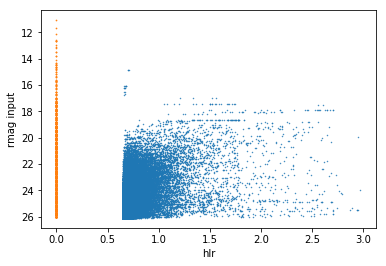

In [4]:
plt.gca().invert_yaxis()
gal_size=np.sqrt(hlr_gal_input**2+0.65**2)
plt.xlabel('hlr')
plt.ylabel('rmag input')
plt.scatter(gal_size,rmag_gal_input,s=0.2)
plt.scatter(hlr_star_input*0,rmag_star_input,s=0.5)
plt.savefig('input_objects.pdf')

### Read THELI coadd galsim catalogues

In [5]:
filename="CFIS_147.9_40.5_Shear_0_Rotation_2_r.MP9602_final_newLF.cat"
ldac_cat = ldac.LDACCat(filename)
ldac_table = ldac.LDACTable(filename)

In [6]:
ra_coadd,dec_coadd = ldac_cat['OBJECTS']['ALPHA_J2000'],ldac_cat['OBJECTS']['DELTA_J2000']
rmag_coadd = ldac_cat['OBJECTS']['MAG_AUTO']
fluxradius_coadd = ldac_cat['OBJECTS']['FLUX_RADIUS']
class_star_coadd = ldac_cat['OBJECTS']['CLASS_STAR']
rmag_coadd.size

39251

#### number of stars from CLASS_STAR

In [7]:
selectstars,=np.where((class_star_coadd > 0.8) & (rmag_coadd < 28))
selectstars.size

662

#### size magnitude plot

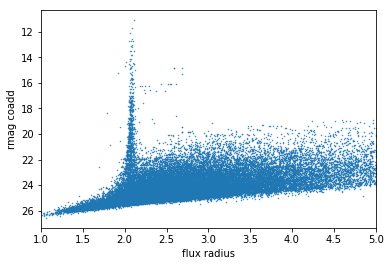

In [8]:
plt.gca().invert_yaxis()
plt.xlim([1,5])
plt.xlabel('flux radius')
plt.ylabel('rmag coadd')
plt.scatter(fluxradius_coadd,rmag_coadd,s=0.2)
plt.savefig('detected_objects_oncoadd.pdf')

In [9]:
select,=np.where((fluxradius_coadd > 2.0) & (fluxradius_coadd < 2.3) & (rmag_coadd < 28))
select.size

7291

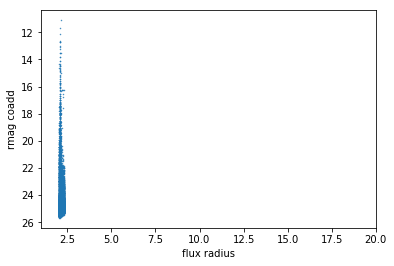

In [10]:
plt.gca().invert_yaxis()
plt.xlim([1,20])
plt.xlabel('flux radius')
plt.ylabel('rmag coadd')
plt.scatter(fluxradius_coadd[select],rmag_coadd[select],s=0.2)

### Write the region file with input and coadd stars

In [11]:
fileout='stars.reg'
fout=open(fileout,'w')
fout.write('fk5\n')

for idx in select:
    string='circle('+str(ra_coadd[idx])+','+str(dec_coadd[idx])+',1.000000")'
    metastring=' # color=red width=2'
    fout.write(string+metastring+'\n')

for i in range(ra_star_input.size):
    string='circle('+str(ra_star_input[i])+','+str(dec_star_input[i])+',1.000000")'
    metastring=' # color=green width=3'
    fout.write(string+metastring+'\n')

#for i in range(ra_gal_input.size):
#    string='circle('+str(ra_gal_input[i])+','+str(dec_gal_input[i])+',1.000000")'
#    metastring=' # color=cyan width=1'
#    fout.write(string+metastring+'\n')

### Matching the two catalogues

In [12]:
from astropy.coordinates import SkyCoord
from astropy import units as u

In [13]:
c = SkyCoord(ra=ra_star_input*u.degree, dec=dec_star_input*u.degree)
catalog = SkyCoord(ra=ra_coadd[select]*u.degree, dec=dec_coadd[select]*u.degree)

In [14]:
idx, d2d, d3d = c.match_to_catalog_sky(catalog)

In [15]:
max_sep = 1.0 * u.arcsec
sep_constraint = d2d < max_sep
c_matches = c[sep_constraint]
catalog_matches = catalog[idx[sep_constraint]]
c_matches.size,catalog_matches.size

(1209, 1209)

### magnitude plot

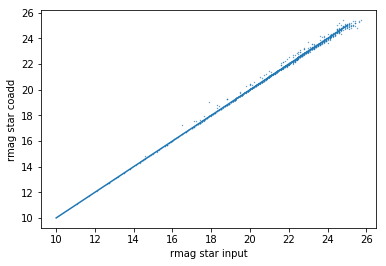

In [18]:
plt.xlabel('rmag star input')
plt.ylabel('rmag star coadd')
plt.scatter(rmag_star_input[sep_constraint],rmag_coadd[select][idx[sep_constraint]],s=0.1)
plt.plot([10,25],[10,25])
plt.savefig('mag_issue.pdf')

### ra dec offset plot

In [19]:
delta_ra=ra_coadd[select][idx[sep_constraint]]-ra_star_input[sep_constraint]
delta_dec=dec_coadd[select][idx[sep_constraint]]-dec_star_input[sep_constraint]

5.1666666666666664e-05

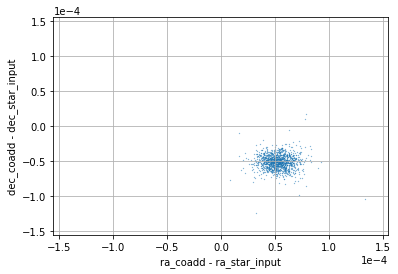

In [20]:
delta_pixel=3.*0.186/3600.
plt.xlim([-delta_pixel,delta_pixel])
plt.ylim([-delta_pixel,delta_pixel])
plt.xlabel('ra_coadd - ra_star_input')
plt.ylabel('dec_coadd - dec_star_input')
plt.scatter(delta_ra*np.cos(40*np.pi/180.),delta_dec,s=0.05)
plt.ticklabel_format(style="sci", scilimits=(0,0))
plt.grid(True)
0.186/3600.

# Magnitude

### Read THELI star catalogues

#### all objects catalogue

In [57]:
data_cat = ldac.LDACCat("CFIS_147.9_40.5_Shear_0_Rotation_2_r.MP9602_final_newLF.cat")

In [58]:
ra_data,dec_data = data_cat['OBJECTS']['ALPHA_J2000'],data_cat['OBJECTS']['DELTA_J2000']
rmag_data = data_cat['OBJECTS']['MAG_AUTO']
fluxradius_data = data_cat['OBJECTS']['FLUX_RADIUS']
class_star_data = data_cat['OBJECTS']['CLASS_STAR']

#### detected stars catalogue from THELI selection

In [40]:
star_data = ldac.LDACCat("CFIS_147.9_40.5_Shear_0_Rotation_2_THELIstars_cut.cat")

In [41]:
ra_star_data,dec_star_data = star_data['OBJECTS']['ALPHA_J2000'],star_data['OBJECTS']['DELTA_J2000']
rmag_star_data = star_data['OBJECTS']['mag_r']

#### matching THELI stars with all objects catalogue

In [42]:
c_data = SkyCoord(ra=ra_star_data*u.degree, dec=dec_star_data*u.degree)
catalog_data = SkyCoord(ra=ra_data*u.degree, dec=dec_data*u.degree)

In [43]:
idx_data, d2d_data, d3d_data = c_data.match_to_catalog_sky(catalog_data)

In [44]:
max_sep = 0.5 * u.arcsec
sep_constraint_data = d2d_data < max_sep
c_data_matches = c_data[sep_constraint_data]
catalog_data_matches = catalog_data[idx_data[sep_constraint_data]]
c_data_matches.size,catalog_data_matches.size

(1012, 1012)

#### size magnitude plot

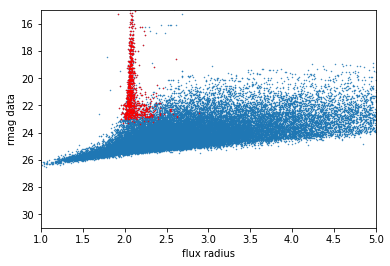

In [45]:
plt.gca().invert_yaxis()
plt.xlim([1,5])
plt.ylim([31,15])
plt.xlabel('flux radius')
plt.ylabel('rmag data')
plt.scatter(fluxradius_data,rmag_data,s=0.2)
plt.scatter(fluxradius_data[idx_data[sep_constraint_data]],rmag_data[idx_data[sep_constraint_data]],s=0.2,color='red')
plt.savefig('THELI_stars.pdf')

#### stars magnitude distribution - unmatched galsim stars

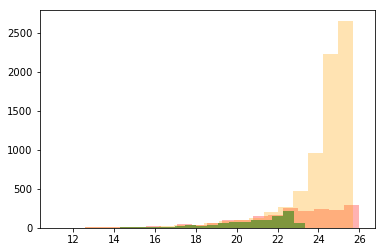

In [46]:
bins=20
plt.hist(rmag_star_input, bins, alpha=0.3,color="red")
plt.hist(rmag_coadd[select], bins, alpha=0.3,color="orange")
plt.hist(rmag_data[idx_data[sep_constraint_data]], bins, alpha=0.5,color="green")
plt.savefig('mag_distributions.pdf')

#### stars magnitude distribution - matched galsim stars

(array([  3.,   2.,   3.,  11.,   6.,   8.,  12.,  11.,  25.,  39.,  24.,
         35.,  56.,  77.,  68.,  94., 106., 152., 219.,  61.]),
 array([12.714725 , 13.245568 , 13.776412 , 14.307256 , 14.8380995,
        15.368943 , 15.899787 , 16.430632 , 16.961475 , 17.49232  ,
        18.023163 , 18.554007 , 19.08485  , 19.615694 , 20.146538 ,
        20.677382 , 21.208225 , 21.739069 , 22.269913 , 22.800756 ,
        23.3316   ], dtype=float32),
 <a list of 20 Patch objects>)

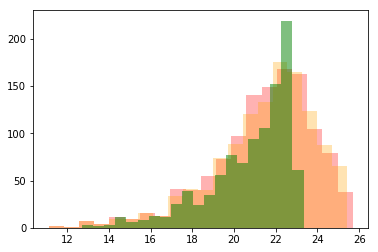

In [47]:
bins=20
plt.hist(rmag_star_input[sep_constraint], bins, alpha=0.3,color="red")
plt.hist(rmag_coadd[select][idx[sep_constraint]], bins, alpha=0.3,color="orange")
plt.hist(rmag_data[idx_data[sep_constraint_data]], bins, alpha=0.5,color="green")

#### matching THELI stars with star input catalogue

In [48]:
c = SkyCoord(ra=ra_star_input*u.degree, dec=dec_star_input*u.degree)
catalog = SkyCoord(ra=ra_star_data*u.degree, dec=dec_star_data*u.degree)

In [49]:
idx_stars, d2d, d3d = c.match_to_catalog_sky(catalog)

In [50]:
max_sep = 1.0 * u.arcsec
sep_constraint_stars = d2d < max_sep
c_matches = c[sep_constraint_stars]
catalog_matches = catalog[idx_stars[sep_constraint_stars]]
c_matches.size,catalog_matches.size

(881, 881)

In [51]:
c = SkyCoord(ra=ra_gal_input*u.degree, dec=dec_gal_input*u.degree)
catalog = SkyCoord(ra=ra_star_data*u.degree, dec=dec_star_data*u.degree)

In [52]:
idx_gal, d2d, d3d = c.match_to_catalog_sky(catalog)

In [53]:
max_sep = 1.0 * u.arcsec
sep_constraint_gal = d2d < max_sep
c_matches = c[sep_constraint_gal]
catalog_matches = catalog[idx_gal[sep_constraint_gal]]
c_matches.size,catalog_matches.size

(208, 208)

#### size magnitude plot

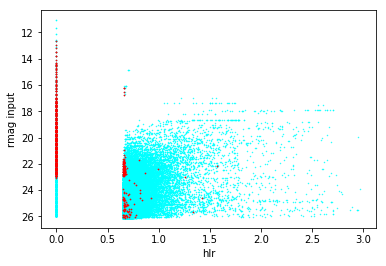

In [54]:
plt.gca().invert_yaxis()
gal_size=np.sqrt(hlr_gal_input**2+0.65**2)
plt.xlabel('hlr')
plt.ylabel('rmag input')
plt.scatter(gal_size,rmag_gal_input,s=0.2,c='cyan')
plt.scatter(hlr_star_input*0,rmag_star_input,s=0.5,c='cyan')
plt.scatter(hlr_star_input[sep_constraint_stars]*0,rmag_star_input[sep_constraint_stars],s=0.5,c='red')
plt.scatter(gal_size[sep_constraint_gal],rmag_gal_input[sep_constraint_gal],s=0.5,c='red')
plt.savefig('matched_THELI_stars.pdf')